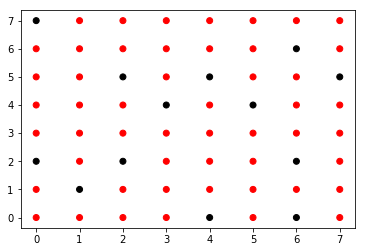

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()
    
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = []
    for i in range(niter):                
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.uniform() < p:
            current = proposed
        post.append(current.sum())
    plot_grid(current.astype('bool'))
    return post[nburn:]

def value(state, **kwargs):
    _ = kwargs
    return state.sum()

def proposal (state, **kwargs):
    i = np.random.choice(8)
    j = np.random.choice(8)
    test = (i == 0 or not state[i - 1, j]) and (j == 0 or not state[i, j - 1]) and \
    (i == state.shape[0] - 1 or not state[i + 1, j]) and \
    (j == state.shape[1] - 1 or not state[i, j + 1])
    
    if test or state[i,j]:
        cur=not state [i,j]
        state[i, j]= cur
        return state
    else:
        return state


size = 8
state = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')
post = metroplis(state, value, proposal, 100000)
   

In [34]:
np.array(post).mean()

15.34357

## Проверка стационарности

In [35]:
def g_test(x, start=0.4, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

g_test(post[1000:])

Ttest_indResult(statistic=-2.3792992100356236, pvalue=0.01734781704133419)

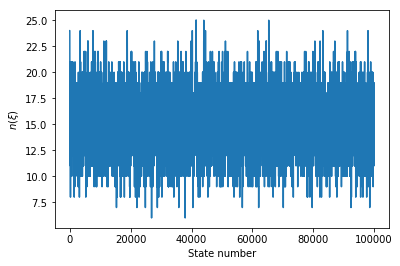

In [36]:
plt.plot(post)
plt.xlabel("State number")
plt.ylabel("$ n(\\xi) $")
plt.show()

### гипотезу стационарности не отвергаем

# Распределение n(ξ)

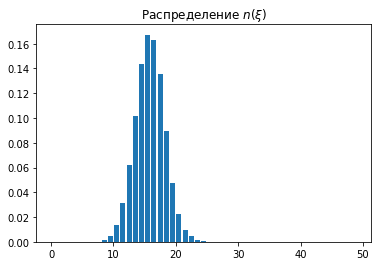

In [39]:
plt.hist(post, bins=np.arange(50),  rwidth=0.8, density=True)
plt.title("Распределение $ n(\\xi) $")
plt.show()